# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
sns.set()

## Import csv dan perbaikan data

In [2]:
from io import StringIO
import re
with open('ML_2_Fellow.csv', encoding='latin') as file:
    lines = [re.sub(r'(^"|"$)','',line.replace('""','"')) for line in file]
raw_data = pd.read_csv(StringIO('\n'.join(lines)))

## Pemeriksaan Data

In [3]:
raw_data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
raw_data.describe(include = 'all')

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,10/31/2011 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        541909 non-null  object 
 2   Barang             540455 non-null  object 
 3   Jumlah             541909 non-null  int64  
 4   Tanggal_Transaksi  541909 non-null  object 
 5   Harga_Satuan       541909 non-null  float64
 6   Kode_Pelanggan     406829 non-null  float64
 7   Negara             541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
raw_data.isnull().sum()

Kode_Bayar                0
Kode_Barang               0
Barang                 1454
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       135080
Negara                    0
dtype: int64

In [7]:
raw_data[raw_data['Jumlah']<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [8]:
raw_data[raw_data['Kode_Pelanggan'] ==17548.0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/2010 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/2010 10:24,1.65,17548.0,United Kingdom
165024,550755,22585,PACK OF 6 BIRDY GIFT TAGS,24,4/20/2011 12:01,1.25,17548.0,United Kingdom
165025,550755,22082,RIBBON REEL STRIPES DESIGN,10,4/20/2011 12:01,1.65,17548.0,United Kingdom
165026,550755,22081,RIBBON REEL FLORA + FAUNA,10,4/20/2011 12:01,1.65,17548.0,United Kingdom


In [9]:
raw_data[raw_data['Harga_Satuan']<0]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [10]:
raw_data[raw_data['Kode_Bayar'].str.startswith('A')]

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


## Pemeriksaan bukan barang

In [11]:
raw_data[raw_data['Kode_Barang'].str.isalpha()].drop_duplicates(subset = ['Kode_Barang'])

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.000,12583.0,France
141,C536379,D,Discount,-1,12/1/2010 9:41,27.500,14527.0,United Kingdom
1814,536544,DOT,DOTCOM POSTAGE,1,12/1/2010 14:32,569.770,NaN,United Kingdom
2239,536569,M,Manual,1,12/1/2010 15:35,1.250,16274.0,United Kingdom
14436,C537581,S,SAMPLES,-1,12/7/2010 12:03,12.950,NaN,United Kingdom
14514,C537600,AMAZONFEE,AMAZON FEE,-1,12/7/2010 12:41,1.000,NaN,United Kingdom
40383,539736,m,Manual,1,12/21/2010 15:18,2.550,NaN,United Kingdom
84016,543358,DCGSSBOY,BOYS PARTY BAG,1,2/7/2011 14:04,3.290,NaN,United Kingdom
84017,543358,DCGSSGIRL,GIRLS PARTY BAG,3,2/7/2011 14:04,3.290,NaN,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,4/15/2011 9:27,0.001,13952.0,United Kingdom


In [12]:
data = raw_data.copy()

In [13]:
#Menghapus transaksi bukan barang
barang_remove = ['POST', 'D', 'DOT', 'S', 'AMAZONFEE', 'B', 'CRUK', 'M', 'm']

data = data[data['Kode_Barang'].isin(barang_remove) == False]

In [14]:
#melengkapi kolom barang dengan bantuan transaksi lain
temp = data.copy()

temp.columns

Index(['Kode_Bayar', 'Kode_Barang', 'Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara'],
      dtype='object')

In [15]:
columns = ['Kode_Bayar', 'Kode_Barang', 'Jumlah', 'Tanggal_Transaksi',
       'Harga_Satuan', 'Kode_Pelanggan', 'Negara']

temp = temp.loc[:,columns]

data = temp.set_index('Kode_Barang').join(data.loc[:,['Kode_Barang', 'Barang']].dropna(subset = ['Barang']).drop_duplicates(subset = ['Kode_Barang']).set_index('Kode_Barang')).reset_index()

In [16]:
data.isnull().sum()

Kode_Barang               0
Kode_Bayar                0
Jumlah                    0
Tanggal_Transaksi         0
Harga_Satuan              0
Kode_Pelanggan       134119
Negara                    0
Barang                  112
dtype: int64

In [17]:
data.describe()

,Jumlah,Harga_Satuan,Kode_Pelanggan
count,539178.000000,539178.000000,405059.000000
mean,9.582218,3.295835,15294.924648
std,218.578542,5.334859,1710.220259
min,-80995.000000,0.000000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16794.000000
max,80995.000000,1050.150000,18287.000000


In [18]:
#menghapus transaksi dengan harga satuan 0
data = data[data['Harga_Satuan']>0]

# Mencari barang dengan jumlah penjualan tertinggi

In [19]:
jumlah_barang = data.groupby(by = ['Kode_Barang']).sum().reset_index()
jumlah_barang = jumlah_barang.loc[:,['Kode_Barang', 'Jumlah']]
nama_barang = data.loc[:, ['Kode_Barang', 'Barang']].drop_duplicates(subset = ['Kode_Barang'])
jumlah_barang = jumlah_barang.join(nama_barang.set_index('Kode_Barang'), on = ['Kode_Barang'])
jumlah_barang.sort_values(by = ['Jumlah'], ascending = False).head(1)

,Kode_Barang,Jumlah,Barang
1112,22197,56450,SMALL POPCORN HOLDER


# Mencari penjualan barang berdasarkan Negara

In [20]:
penjualan_negara = data.copy()
penjualan_negara.loc[:,'Total_Harga'] = penjualan_negara['Jumlah'] * penjualan_negara['Harga_Satuan']
penjualan_negara = penjualan_negara.groupby(by = ['Negara', 'Kode_Barang']).sum().reset_index()
penjualan_negara = penjualan_negara.join(nama_barang.set_index('Kode_Barang'), on = ['Kode_Barang'])

In [21]:
#mencari barang dengan total harga tertinggi dari 10 negara
penjualan_negara.sort_values(by = ['Total_Harga'], ascending = False).drop_duplicates(subset = ['Negara'], keep = 'first').head(10)

,Negara,Kode_Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,Total_Harga,Barang
16695,United Kingdom,22423,10375,26182.21,24120027.0,134405.94,REGENCY CAKESTAND 3 TIER
10829,Netherlands,23084,4801,14.27,102522.0,9568.48,RABBIT NIGHT LIGHT
7757,Germany,22423,737,973.35,1016875.0,8257.35,REGENCY CAKESTAND 3 TIER
3796,EIRE,22423,647,947.55,1018009.0,7442.85,REGENCY CAKESTAND 3 TIER
6596,France,23084,4023,141.79,936169.0,7275.12,RABBIT NIGHT LIGHT
10091,Japan,23084,3401,8.95,63900.0,6087.79,RABBIT NIGHT LIGHT
13879,Spain,84997D,1089,23.34,79577.0,3957.75,PINK 3 PIECE POLKADOT CUTLERY SET
397,Australia,23084,1884,11.03,74522.0,3375.84,RABBIT NIGHT LIGHT
5534,Finland,84997D,552,38.34,126318.0,2063.28,PINK 3 PIECE POLKADOT CUTLERY SET
14015,Sweden,22492,2916,3.90,99503.0,1895.40,MINI PAINT SET VINTAGE


In [22]:
#mencari barang dengan jumlah penjualan tertinggi dari 10 negara
penjualan_negara.sort_values(by = ['Jumlah'], ascending = False).drop_duplicates(subset = ['Negara'], keep = 'first').head(10)

,Negara,Kode_Barang,Jumlah,Harga_Satuan,Kode_Pelanggan,Total_Harga,Barang
16494,United Kingdom,22197,52928,1440.86,15904486.0,48214.77,SMALL POPCORN HOLDER
10829,Netherlands,23084,4801,14.27,102522.0,9568.48,RABBIT NIGHT LIGHT
6596,France,23084,4023,141.79,936169.0,7275.12,RABBIT NIGHT LIGHT
10091,Japan,23084,3401,8.95,63900.0,6087.79,RABBIT NIGHT LIGHT
14015,Sweden,22492,2916,3.90,99503.0,1895.40,MINI PAINT SET VINTAGE
224,Australia,22492,2916,4.15,86921.0,1607.40,MINI PAINT SET VINTAGE
3658,EIRE,22197,1809,33.61,578509.0,1407.65,SMALL POPCORN HOLDER
7692,Germany,22326,1218,353.20,1518740.0,3554.70,ROUND SNACK BOXES SET OF4 WOODLAND
13879,Spain,84997D,1089,23.34,79577.0,3957.75,PINK 3 PIECE POLKADOT CUTLERY SET
14625,Switzerland,22554,639,28.90,205539.0,977.55,PLASTERS IN TIN WOODLAND ANIMALS


# Segmentasi pelanggan

In [23]:
data2 = data[data['Kode_Pelanggan'].notnull()]

In [24]:
#menghapus pelanggan yang memiliki jumlah pembelian barang negatif karena tidak logis
data_min = data2.groupby(by = ['Kode_Pelanggan']).min()
pelanggan_remove = data_min[data_min['Jumlah'] < 0].reset_index().loc[:, 'Kode_Pelanggan']
data2 = data2[data2['Kode_Pelanggan'].isin(pelanggan_remove) == False]

In [25]:
data2.loc[:,'Total_Harga'] = data2['Jumlah'] * data2['Harga_Satuan']
pelanggan_total = data2.groupby(['Kode_Pelanggan']).sum()
harga_satuan_rata = pelanggan_total['Total_Harga']/pelanggan_total['Jumlah']
pelanggan_rata = data2.groupby(['Kode_Pelanggan']).mean()
pelanggan_rata['Harga_Satuan'] = harga_satuan_rata

In [26]:
pelanggan_rata.describe()

,Jumlah,Harga_Satuan,Total_Harga
count,2828.000000,2828.000000,2828.000000
mean,23.005383,2.359635,33.306506
std,122.551432,7.008411,119.254068
min,1.000000,0.085619,2.101286
25%,5.000000,1.352590,9.918233
50%,9.513158,1.768753,16.759318
75%,14.370635,2.364575,23.681614
max,4300.000000,295.000000,3861.000000


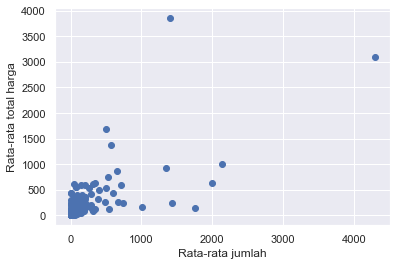

In [27]:
plt.scatter(pelanggan_rata['Jumlah'],pelanggan_rata['Total_Harga'])
plt.xlabel('Rata-rata jumlah')
plt.ylabel('Rata-rata total harga')
plt.show()

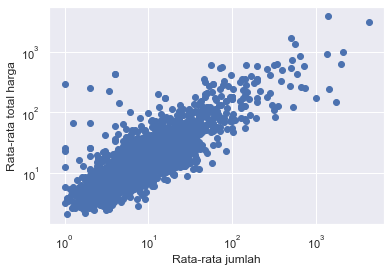

In [28]:
plt.scatter(pelanggan_rata['Jumlah'],pelanggan_rata['Total_Harga'])
plt.xlabel('Rata-rata jumlah')
plt.ylabel('Rata-rata total harga')
plt.xscale('log')
plt.yscale('log')
plt.show()

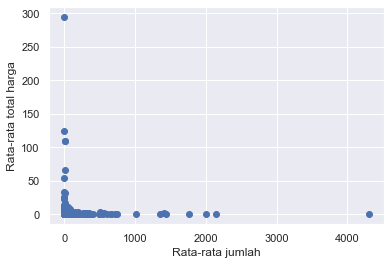

In [29]:
plt.scatter(pelanggan_rata['Jumlah'],pelanggan_rata['Harga_Satuan'])
plt.xlabel('Rata-rata jumlah')
plt.ylabel('Rata-rata total harga')
plt.show()

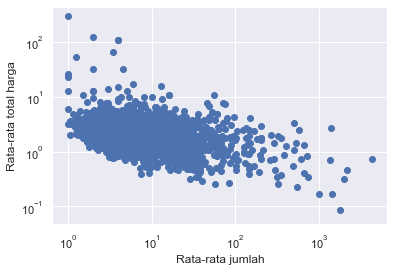

In [30]:
plt.scatter(pelanggan_rata['Jumlah'],pelanggan_rata['Harga_Satuan'])
plt.xlabel('Rata-rata jumlah')
plt.ylabel('Rata-rata total harga')
plt.xscale('log')
plt.yscale('log')
plt.show()

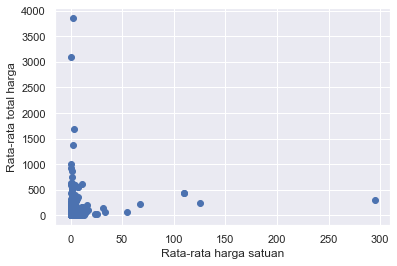

In [31]:
plt.scatter(pelanggan_rata['Harga_Satuan'],pelanggan_rata['Total_Harga'])
plt.xlabel('Rata-rata harga satuan')
plt.ylabel('Rata-rata total harga')
plt.show()

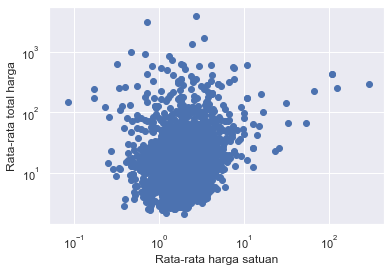

In [32]:
plt.scatter(pelanggan_rata['Harga_Satuan'],pelanggan_rata['Total_Harga'])
plt.xlabel('Rata-rata harga satuan')
plt.ylabel('Rata-rata total harga')
plt.xscale('log')
plt.yscale('log')
plt.show()

## Clustering

In [33]:
clustering = pelanggan_rata.loc[:, ['Harga_Satuan', 'Total_Harga']]
clustering['Harga_Satuan'] = np.log(clustering['Harga_Satuan'])
clustering['Total_Harga'] = np.log(clustering['Total_Harga'])

In [34]:
#standarisasi variabel
x_scaled = preprocessing.scale(clustering)

In [35]:
kmeans_scaled = KMeans(3)
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=3)

In [36]:
clusters_scaled = clustering.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

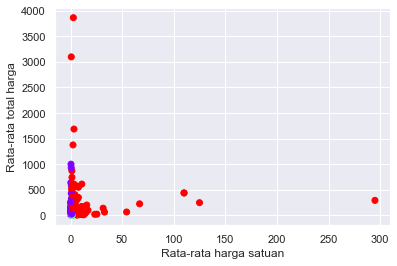

In [37]:
plt.scatter(pelanggan_rata['Harga_Satuan'], pelanggan_rata['Total_Harga'], c= clusters_scaled['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Rata-rata harga satuan')
plt.ylabel('Rata-rata total harga')
plt.show()

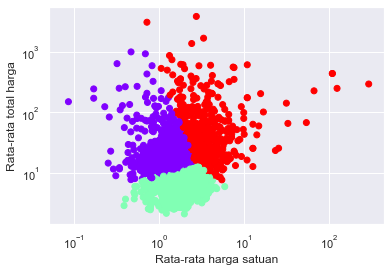

In [38]:
plt.scatter(pelanggan_rata['Harga_Satuan'], pelanggan_rata['Total_Harga'], c= clusters_scaled['cluster_pred'], cmap = 'rainbow')
plt.xlabel('Rata-rata harga satuan')
plt.ylabel('Rata-rata total harga')
plt.xscale('log')
plt.yscale('log')
plt.show()